<a href="https://colab.research.google.com/github/manjunath7901/Cricket-Player-Statistics-And-Analysis/blob/main/python_projectf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
SELECT_A_PLAYER_TO_VIEW_HIS_STATISTICS = 'SACHIN' #@param["DHONI","ROHITH","VIRAT","SACHIN","KL RAHUL","GAUTAM GAMBIR","RAHUL DRAVID","V SEHWAG"]

x=print('YOU SELECTED '+ SELECT_A_PLAYER_TO_VIEW_HIS_STATISTICS)
if SELECT_A_PLAYER_TO_VIEW_HIS_STATISTICS == 'ROHITH':
  print('ROHITH ID IS 34102')
elif SELECT_A_PLAYER_TO_VIEW_HIS_STATISTICS == 'VIRAT':
  print("VIRAT ID IS 253802")
elif SELECT_A_PLAYER_TO_VIEW_HIS_STATISTICS == 'DHONI':
  print("DHONI ID IS 28081")
elif SELECT_A_PLAYER_TO_VIEW_HIS_STATISTICS == 'SACHIN':
  print("SACHIN ID IS 35320")
elif SELECT_A_PLAYER_TO_VIEW_HIS_STATISTICS == 'KL RAHUL':
  print("KL RAHUL ID IS 422108")
elif SELECT_A_PLAYER_TO_VIEW_HIS_STATISTICS == 'GAUTAM GAMBIR':
  print("GAUTAM GAMBIR ID IS 28763")
elif SELECT_A_PLAYER_TO_VIEW_HIS_STATISTICS == 'RAHUL DRAVID':
  print("RAHUL DRAVID ID IS 28114")
elif SELECT_A_PLAYER_TO_VIEW_HIS_STATISTICS == 'V SEHWAG':
  print("V SEHWAG ID IS 35263")


YOU SELECTED SACHIN
SACHIN ID IS 35320


In [ ]:
input_player_id = 35320 #@param {type:"integer"}
a=input_player_id
player=a

In [ ]:
#@title Run to import libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [ ]:
#@title Run to do webscrapping
import requests
from bs4 import BeautifulSoup
import csv

def extract_batting_data(player_id):
  URL = 'https://stats.espncricinfo.com/ci/engine/player/'+ str(player_id)+'.html?class=2;template=results;type=batting;view=match'
  r = requests.get(URL)
   
  soup = BeautifulSoup(r.content, 'html5lib')
  shorted = soup.findAll('table', attrs = {'class':'engineTable'})[3]
  with open("out.csv", "w") as f:
    wr = csv.writer(f)
    headers = [td.text for td in shorted.select("tr")[0].find_all("th")]
    wr.writerow(headers)
    wr.writerows([[td.text for td in row.find_all("td")] for row in shorted.select("tr + tr")])

In [ ]:
#@title Run to extract  data and create csv file
extract_batting_data(player)

In [ ]:
#@title Run to read  the csv file
df=pd.read_csv("/content/out.csv")

In [ ]:
#@title Showing first five rows
df.head()

,Bat1,Runs,BF,SR,4s,6s,Unnamed: 6,Opposition,Ground,Start Date,Unnamed: 10
0,0,0,2,0.00,0,0,NaN,v New Zealand,Dunedin,1 Mar 1990,ODI # 612
1,36,36,39,92.30,5,0,NaN,v New Zealand,Wellington,6 Mar 1990,ODI # 616
2,10,10,12,83.33,0,0,NaN,v Sri Lanka,Sharjah,25 Apr 1990,ODI # 623
3,20,20,25,80.00,1,0,NaN,v Pakistan,Sharjah,27 Apr 1990,ODI # 625
4,19,19,35,54.28,1,1,NaN,v England,Leeds,18 Jul 1990,ODI # 634


#Data    cleaning

In [ ]:
#@title Run to Remove the first 2 unwanted characters in each row in opposition column using slicing


df['opposition']=df['Opposition'].apply(lambda x: x[2:])
df.head(5)

,Bat1,Runs,BF,SR,4s,6s,Unnamed: 6,Opposition,Ground,Start Date,Unnamed: 10,opposition
0,0,0,2,0.00,0,0,NaN,v New Zealand,Dunedin,1 Mar 1990,ODI # 612,New Zealand
1,36,36,39,92.30,5,0,NaN,v New Zealand,Wellington,6 Mar 1990,ODI # 616,New Zealand
2,10,10,12,83.33,0,0,NaN,v Sri Lanka,Sharjah,25 Apr 1990,ODI # 623,Sri Lanka
3,20,20,25,80.00,1,0,NaN,v Pakistan,Sharjah,27 Apr 1990,ODI # 625,Pakistan
4,19,19,35,54.28,1,1,NaN,v England,Leeds,18 Jul 1990,ODI # 634,England


In [ ]:
#@title Drop the unwanted Opposition column
df.drop(columns='Opposition',inplace=True)
df.head()

,Bat1,Runs,BF,SR,4s,6s,Unnamed: 6,Ground,Start Date,Unnamed: 10,opposition
0,0,0,2,0.00,0,0,NaN,Dunedin,1 Mar 1990,ODI # 612,New Zealand
1,36,36,39,92.30,5,0,NaN,Wellington,6 Mar 1990,ODI # 616,New Zealand
2,10,10,12,83.33,0,0,NaN,Sharjah,25 Apr 1990,ODI # 623,Sri Lanka
3,20,20,25,80.00,1,0,NaN,Sharjah,27 Apr 1990,ODI # 625,Pakistan
4,19,19,35,54.28,1,1,NaN,Leeds,18 Jul 1990,ODI # 634,England


# Extracting year from the date column and creating a year column

In [ ]:
#@title Run to Extracting year from the date column and creating a new year column
df.rename(columns={'Start Date':'Date'},inplace=True)
df

,Bat1,Runs,BF,SR,4s,6s,Unnamed: 6,Ground,Date,Unnamed: 10,opposition
0,0,0,2,0.00,0,0,NaN,Dunedin,1 Mar 1990,ODI # 612,New Zealand
1,36,36,39,92.30,5,0,NaN,Wellington,6 Mar 1990,ODI # 616,New Zealand
2,10,10,12,83.33,0,0,NaN,Sharjah,25 Apr 1990,ODI # 623,Sri Lanka
3,20,20,25,80.00,1,0,NaN,Sharjah,27 Apr 1990,ODI # 625,Pakistan
4,19,19,35,54.28,1,1,NaN,Leeds,18 Jul 1990,ODI # 634,England
...,...,...,...,...,...,...,...,...,...,...,...
457,14,14,15,93.33,2,0,NaN,Sydney,26 Feb 2012,ODI # 3250,Australia
458,39,39,30,130.00,5,0,NaN,Hobart,28 Feb 2012,ODI # 3251,Sri Lanka
459,6,6,19,31.57,1,0,NaN,Mirpur,13 Mar 2012,ODI # 3259,Sri Lanka
460,114,114,147,77.55,12,1,NaN,Mirpur,16 Mar 2012,ODI # 3261,Bangladesh


In [ ]:
#@title Run to create a seperate year column
#from dateutil.parser import parse
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
#df['year'] = pd.to_datetime(df.Date, format='%Y-%m-%d %H:%M:%S')
df['year']=df['Date'].dt.year.astype(int)
#df['year']=df['Start Date'].dt.year.astype(String)
df.head(5)

,Bat1,Runs,BF,SR,4s,6s,Unnamed: 6,Ground,Date,Unnamed: 10,opposition,year
0,0,0,2,0.00,0,0,NaN,Dunedin,1990-03-01,ODI # 612,New Zealand,1990
1,36,36,39,92.30,5,0,NaN,Wellington,1990-03-06,ODI # 616,New Zealand,1990
2,10,10,12,83.33,0,0,NaN,Sharjah,1990-04-25,ODI # 623,Sri Lanka,1990
3,20,20,25,80.00,1,0,NaN,Sharjah,1990-04-27,ODI # 625,Pakistan,1990
4,19,19,35,54.28,1,1,NaN,Leeds,1990-07-18,ODI # 634,England,1990


In [ ]:
#@title  Create a column that player is out or not out in the innings
df['score']=df['Bat1'].apply(str)
df['notout']=np.where(df['score'].str.endswith("*"),1,0)
df.head(5)

,Bat1,Runs,BF,SR,4s,6s,Unnamed: 6,Ground,Date,Unnamed: 10,opposition,year,score,notout
0,0,0,2,0.00,0,0,NaN,Dunedin,1990-03-01,ODI # 612,New Zealand,1990,0,0
1,36,36,39,92.30,5,0,NaN,Wellington,1990-03-06,ODI # 616,New Zealand,1990,36,0
2,10,10,12,83.33,0,0,NaN,Sharjah,1990-04-25,ODI # 623,Sri Lanka,1990,10,0
3,20,20,25,80.00,1,0,NaN,Sharjah,1990-04-27,ODI # 625,Pakistan,1990,20,0
4,19,19,35,54.28,1,1,NaN,Leeds,1990-07-18,ODI # 634,England,1990,19,0


In [ ]:
#@title Delete Unnamed: 6 to opposition
df.drop(columns='Unnamed: 6',inplace=True)
df.head()

,Bat1,Runs,BF,SR,4s,6s,Ground,Date,Unnamed: 10,opposition,year,score,notout
0,0,0,2,0.00,0,0,Dunedin,1990-03-01,ODI # 612,New Zealand,1990,0,0
1,36,36,39,92.30,5,0,Wellington,1990-03-06,ODI # 616,New Zealand,1990,36,0
2,10,10,12,83.33,0,0,Sharjah,1990-04-25,ODI # 623,Sri Lanka,1990,10,0
3,20,20,25,80.00,1,0,Sharjah,1990-04-27,ODI # 625,Pakistan,1990,20,0
4,19,19,35,54.28,1,1,Leeds,1990-07-18,ODI # 634,England,1990,19,0


In [ ]:
#@title Delete Unnamed: 10 column
df.drop(columns='Unnamed: 10',inplace=True)
df.head()

,Bat1,Runs,BF,SR,4s,6s,Ground,Date,opposition,year,score,notout
0,0,0,2,0.00,0,0,Dunedin,1990-03-01,New Zealand,1990,0,0
1,36,36,39,92.30,5,0,Wellington,1990-03-06,New Zealand,1990,36,0
2,10,10,12,83.33,0,0,Sharjah,1990-04-25,Sri Lanka,1990,10,0
3,20,20,25,80.00,1,0,Sharjah,1990-04-27,Pakistan,1990,20,0
4,19,19,35,54.28,1,1,Leeds,1990-07-18,England,1990,19,0


In [ ]:
#@title Selecting data from matches the player have played
df_new=df.loc[((df['score'] != 'DNB') & (df['score'] != 'TDNB')),'Runs':]
df_new

,Runs,BF,SR,4s,6s,Ground,Date,opposition,year,score,notout
0,0,2,0.00,0,0,Dunedin,1990-03-01,New Zealand,1990,0,0
1,36,39,92.30,5,0,Wellington,1990-03-06,New Zealand,1990,36,0
2,10,12,83.33,0,0,Sharjah,1990-04-25,Sri Lanka,1990,10,0
3,20,25,80.00,1,0,Sharjah,1990-04-27,Pakistan,1990,20,0
4,19,35,54.28,1,1,Leeds,1990-07-18,England,1990,19,0
...,...,...,...,...,...,...,...,...,...,...,...
457,14,15,93.33,2,0,Sydney,2012-02-26,Australia,2012,14,0
458,39,30,130.00,5,0,Hobart,2012-02-28,Sri Lanka,2012,39,0
459,6,19,31.57,1,0,Mirpur,2012-03-13,Sri Lanka,2012,6,0
460,114,147,77.55,12,1,Mirpur,2012-03-16,Bangladesh,2012,114,0


In [ ]:
#@title Creating new dataframe from previous one
df_new['runs_scored'] = df_new['Runs'].astype(int)
df_new['balls_faced'] = df_new['BF'].astype(int)
df_new['strike_rate'] = df_new['SR'].astype(float)
df_new['fours'] = df_new['4s'].astype(int)
df_new['sixes'] = df_new['6s'].astype(int)
df_new

,Runs,BF,SR,4s,6s,Ground,Date,opposition,year,score,notout,runs_scored,balls_faced,strike_rate,fours,sixes
0,0,2,0.00,0,0,Dunedin,1990-03-01,New Zealand,1990,0,0,0,2,0.00,0,0
1,36,39,92.30,5,0,Wellington,1990-03-06,New Zealand,1990,36,0,36,39,92.30,5,0
2,10,12,83.33,0,0,Sharjah,1990-04-25,Sri Lanka,1990,10,0,10,12,83.33,0,0
3,20,25,80.00,1,0,Sharjah,1990-04-27,Pakistan,1990,20,0,20,25,80.00,1,0
4,19,35,54.28,1,1,Leeds,1990-07-18,England,1990,19,0,19,35,54.28,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,14,15,93.33,2,0,Sydney,2012-02-26,Australia,2012,14,0,14,15,93.33,2,0
458,39,30,130.00,5,0,Hobart,2012-02-28,Sri Lanka,2012,39,0,39,30,130.00,5,0
459,6,19,31.57,1,0,Mirpur,2012-03-13,Sri Lanka,2012,6,0,6,19,31.57,1,0
460,114,147,77.55,12,1,Mirpur,2012-03-16,Bangladesh,2012,114,0,114,147,77.55,12,1


In [ ]:
#@title To display highest run
df_new['Runs'] = df_new['Runs'].astype(int)
column=df_new['Runs']
max_value=column.max()
print(max_value)

200


In [ ]:
#@title Displaying player stats
first_match_date = df['Date'].dt.date.min().strftime('%B %d %Y')  # first match
#first_match_date = df_new['Date'].iloc[0] # first match
print('First match:', first_match_date)

last_match_date = df['Date'].dt.date.max().strftime('%B %d %Y') # last match
#last_match_date = df_new['Date'].iloc[-1] # last match
print('Last match:', last_match_date)
number_of_matches = df.shape[0] # number of mathces played in career
print('Number of matches played:', number_of_matches)
number_of_inns = df_new.shape[0] # number of innings
print('Number of innings played:', number_of_inns)
not_outs = df_new['notout'].sum() # number of not outs in career
print('Not outs:', not_outs)
runs_scored = df_new['runs_scored'].sum() # runs scored in career
print('Runs scored in career:', runs_scored)
balls_faced = df_new['balls_faced'].sum() # balls faced in career
print('Balls faced in career:', balls_faced)
career_sr = (runs_scored / balls_faced)*100 # career strike rate
print('Career strike rate: {:.2f}'.format(career_sr))
career_avg = (runs_scored / (number_of_inns - not_outs)) # career average
print('Career average: {:.2f}'.format(career_avg))
print('Highest Score:',max_value)
hundreds = df_new.loc[df_new['runs_scored'] >= 100].shape[0] # number of 100s
print('Number of 100s:', hundreds)
fifties = df_new.loc[(df_new['runs_scored']>=50)&(df_new['runs_scored']<100)].shape[0] #number of 50s
print('Number of 50s:', fifties)
fours = df_new['fours'].sum() # number of fours in career
print('Number of 4s:', fours)
sixes = df_new['sixes'].sum() # number of sixes in career
print('Number of 6s:', sixes)

First match: March 01 1990
Last match: March 18 2012
Number of matches played: 462
Number of innings played: 451
Not outs: 41
Runs scored in career: 18426
Balls faced in career: 21366
Career strike rate: 86.24
Career average: 44.94
Highest Score: 200
Number of 100s: 49
Number of 50s: 96
Number of 4s: 2016
Number of 6s: 195


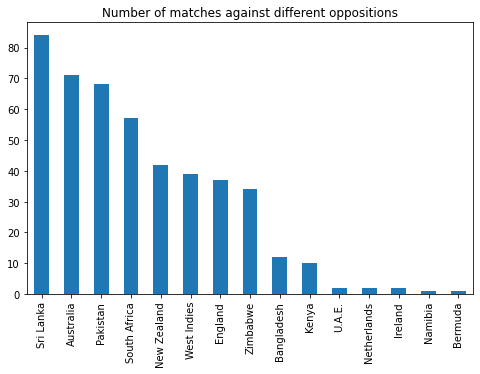

In [ ]:
#@title Number of matches against different oppositions
df['opposition'].value_counts().plot(kind='bar', title='Number of matches against different oppositions', figsize=(8, 5));

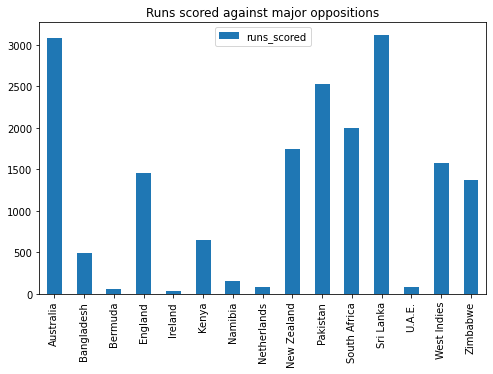

In [ ]:
#@title Runs scored  against major oppositions
runs_scored_by_opposition = pd.DataFrame(df_new.groupby('opposition')['runs_scored'].sum())
runs_scored_by_opposition.plot(kind='bar', title='Runs scored against major oppositions', figsize=(8, 5))
plt.xlabel(None);


In [ ]:
#@title Batting average against each team
innings_by_opposition = pd.DataFrame(df_new.groupby('opposition')['Date'].count())
not_outs_by_opposition = pd.DataFrame(df_new.groupby('opposition')['notout'].sum())
temp = runs_scored_by_opposition.merge(innings_by_opposition, left_index=True, right_index=True)
average_by_opposition = temp.merge(not_outs_by_opposition, left_index=True, right_index=True)
average_by_opposition.rename(columns = {'Date': 'innings'}, inplace=True)
average_by_opposition['eff_num_of_inns'] = average_by_opposition['innings'] - average_by_opposition['notout']
average_by_opposition['average'] = average_by_opposition['runs_scored'] / average_by_opposition['eff_num_of_inns']
average_by_opposition.replace(np.inf, np.nan, inplace=True)
major_nations = ['Australia', 'England', 'New Zealand', 'Pakistan', 'South Africa', 'Sri Lanka', 'West Indies']

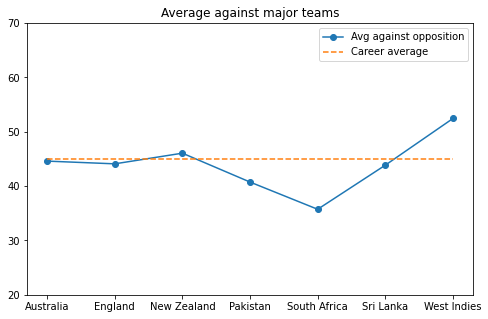

In [ ]:
#@title Ploting average against major teams
plt.figure(figsize = (8, 5))
plt.plot(average_by_opposition.loc[major_nations, 'average'].values, marker='o')
plt.plot([career_avg]*len(major_nations), '--')
plt.title('Average against major teams')
plt.xticks(range(0, 7), major_nations)
plt.ylim(20, 70)
plt.legend(['Avg against opposition', 'Career average']);

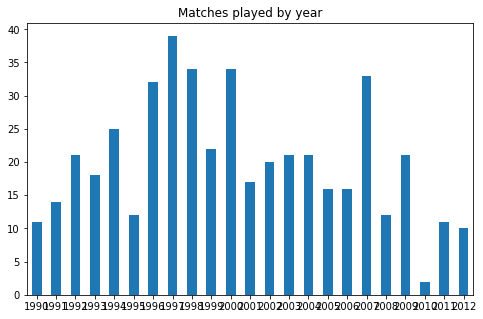

In [ ]:
#@title Matches played in a year 
df['year'].value_counts().sort_index().plot(kind='bar', title='Matches played by year', figsize=(8, 5))
plt.xticks(rotation=0);

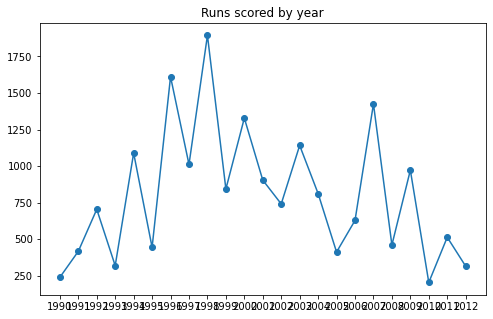

In [ ]:
#@title Runs scored based on years
df_new.groupby('year')['runs_scored'].sum().plot(kind='line', marker='o', title='Runs scored by year', figsize=(8, 5))
years = df['year'].unique().tolist()
plt.xticks(years)
plt.xlabel(None);

In [ ]:
#@title Career average progression
df_new.reset_index(drop=True, inplace=True)
career_average = pd.DataFrame()
career_average['runs_scored_in_career'] = df_new['runs_scored'].cumsum()
career_average['innings'] = df_new.index.tolist()
career_average['innings'] = career_average['innings'].apply(lambda x: x+1)
career_average['not_outs_in_career'] = df_new['notout'].cumsum()
career_average['eff_num_of_inns'] = career_average['innings'] - career_average['not_outs_in_career']
career_average['average'] = career_average['runs_scored_in_career'] / career_average['eff_num_of_inns']

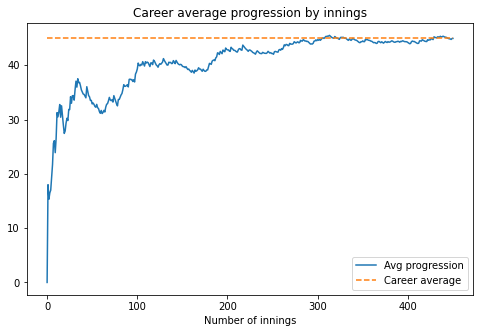

In [ ]:
#@title Plotting average progression by innings
plt.figure(figsize = (8, 5))
plt.plot(career_average['average'])
plt.plot([career_avg]*career_average.shape[0], '--')
plt.title('Career average progression by innings')
plt.xlabel('Number of innings')
plt.legend(['Avg progression', 'Career average']);